In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sn
sn.set_style('darkgrid')
from pyecharts.charts import bar
from pyecharts.charts.bar import Bar
from pyecharts.charts import pie

#忽视警告，中文乱码,显示全部
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
pd.set_option('display.max_columns', None)  # 输出结果显示全部列

In [2]:
#留档
df_original = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
test_original = pd.read_csv('titanic_test.csv')
PassengerId =test_original['PassengerId']

# 数据基本情况

In [3]:
df =  pd.read_csv('titanic_train.csv')

df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 整体来看
### 生还率为38%
### 平均年龄30，基本无偏
### 平均票价32，但是票价呈左偏
### 有为0的票价

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 年龄有177条缺失值
### 客舱有687条缺失值
### 登船口Embarked有2条缺失值

# 数据探索

In [4]:
one_sur_male = len(df.query('Pclass == 1').query('Sex == "male"').query('Survived == 1'))/len(df.query('Pclass == 1').query('Sex == "male"'))
one_sur_male = round(one_sur_male,2)
one_sur_male
one_sur_female = len(df.query('Pclass == 1').query('Sex == "female"').query('Survived == 1'))/len(df.query('Pclass == 1').query('Sex == "female"'))
one_sur_female = round(one_sur_female,2)
one_sur_female
two_sur_male = len(df.query('Pclass == 2').query('Sex == "male"').query('Survived == 1'))/len(df.query('Pclass == 2').query('Sex == "male"'))
two_sur_male = round(two_sur_male,2)
two_sur_male
two_sur_female = len(df.query('Pclass == 2').query('Sex == "female"').query('Survived == 1'))/len(df.query('Pclass == 2').query('Sex == "female"'))
two_sur_female = round(two_sur_female,2)
two_sur_female
three_sur_male = len(df.query('Pclass == 3').query('Sex == "male"').query('Survived == 1'))/len(df.query('Pclass == 3').query('Sex == "male"'))
three_sur_male = round(three_sur_male,2)
three_sur_male
three_sur_female = len(df.query('Pclass == 3').query('Sex == "female"').query('Survived == 1'))/len(df.query('Pclass == 3').query('Sex == "female"'))
three_sur_female = round(three_sur_female,2)
three_sur_female
index_list = ['一等舱','二等舱','三等舱']
male_list = [one_sur_male,two_sur_male,three_sur_male]
female_list = [one_sur_female,two_sur_female,three_sur_female]
bar = Bar('各仓位男女生还率对比')
bar.add('女性',index_list,female_list,mark_line=['average'],mark_point=['max','min'])
bar.add('男性',index_list,male_list,mark_line=['average'],mark_point=['max','min'])
bar

## 女性优先，体现在各个等级的船舱中
## 整体的生还率随船舱等级递减，即社会地位越高或越有财富的人生存几率越大

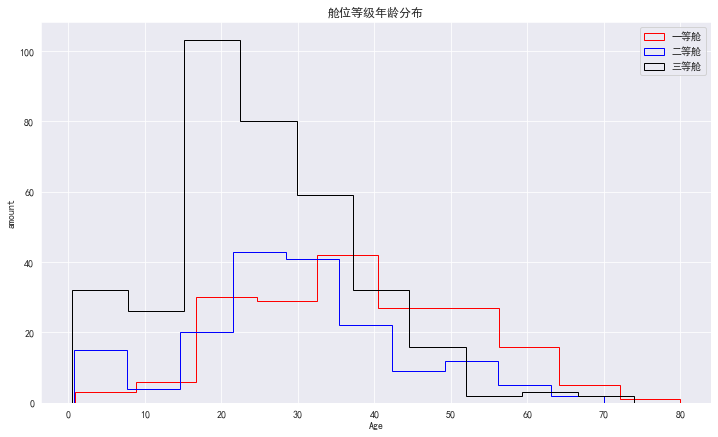

In [23]:
#各船舱年龄段的分布
plt.figure(figsize=(12,7))
df.query('Pclass == 1').Age.plot(kind='hist',color='red',histtype='step',label='一等舱')
df.query('Pclass == 2').Age.plot(kind='hist',color='blue',histtype='step',label='二等舱')
df.query('Pclass == 3').Age.plot(kind='hist',color='black',histtype='step',label='三等舱')
plt.title('舱位等级年龄分布')
plt.xlabel('Age')
plt.ylabel('amount')
plt.legend()
plt.show()

## 三等舱的乘客年龄整体较为年轻
## 二等舱大致集中在15-45之间
## 一等舱分布较为均匀，大致在17-60之间，且较为对称
## 总体来看，船舱等级越高，乘客年龄越大

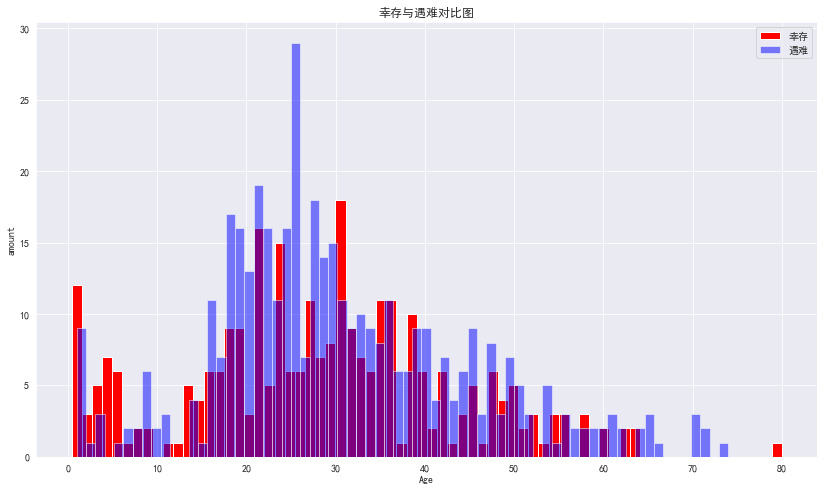

In [25]:
#年龄对存活的影响
plt.figure(figsize=(14,8))
survived = df[df.Age.notnull()].query('Survived == 1').Age.plot(kind='hist',color='red',bins=70,label='幸存')
un_survived = df[df.Age.notnull()].query('Survived == 0').Age.plot(kind='hist',color='blue',alpha=0.5,bins=70,label='遇难')
plt.title('幸存与遇难对比图')
plt.xlabel('Age')
plt.ylabel('amount')
plt.legend()
plt.show()

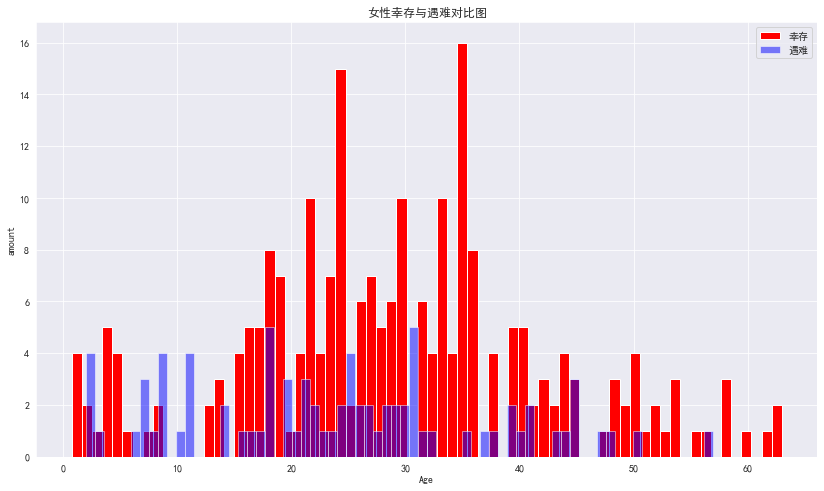

In [120]:
#不同性别关于年龄和是否存活的关系
#女性
plt.figure(figsize=(14,8))
female_survived = df[df.Age.notnull()].query('Survived == 1').query('Sex == "female"').Age.plot(kind='hist',color='red',bins=70,label='幸存')
female_un_survived = df[df.Age.notnull()].query('Survived == 0').query('Sex == "female"').Age.plot(kind='hist',color='blue',alpha=0.5,bins=70,label='遇难')
plt.title('女性幸存与遇难对比图')
plt.xlabel('Age')
plt.ylabel('amount')
plt.legend()
plt.show()

## 女性的遇难率和存活率分布都较为均匀

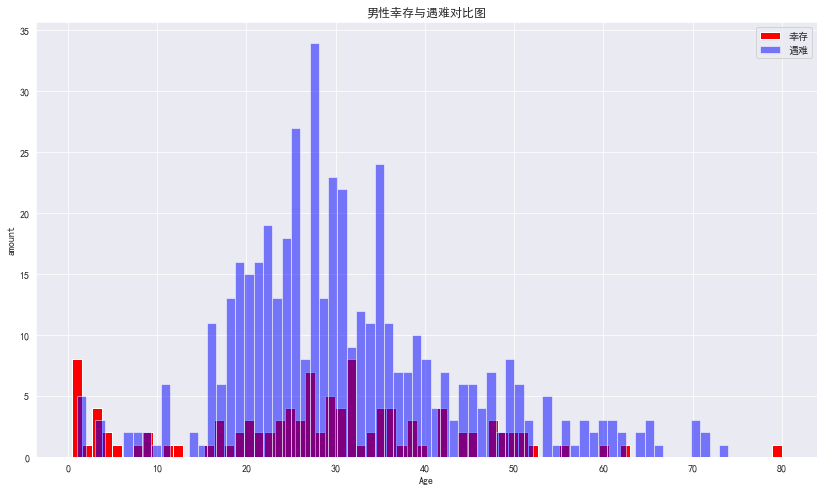

In [121]:
#不同性别关于年龄和是否存活的关系
#男性
plt.figure(figsize=(14,8))
female_survived = df[df.Age.notnull()].query('Survived == 1').query('Sex == "male"').Age.plot(kind='hist',color='red',bins=70,label='幸存')
female_un_survived = df[df.Age.notnull()].query('Survived == 0').query('Sex == "male"').Age.plot(kind='hist',color='blue',alpha=0.5,bins=70,label='遇难')
plt.title('男性幸存与遇难对比图')
plt.xlabel('Age')
plt.ylabel('amount')
plt.legend()
plt.show()

### 男性的遇难率较大，集中在15-55之间
### 且大于50岁的男性，存活率很低

# 

### 同一年龄段，蓝色在红色之上表示遇难的比例更大，反之幸存的比例更大
### 总体而言，很明显低年龄部分和80岁左右的幸存比例更高，体现了先救小孩老人的特点


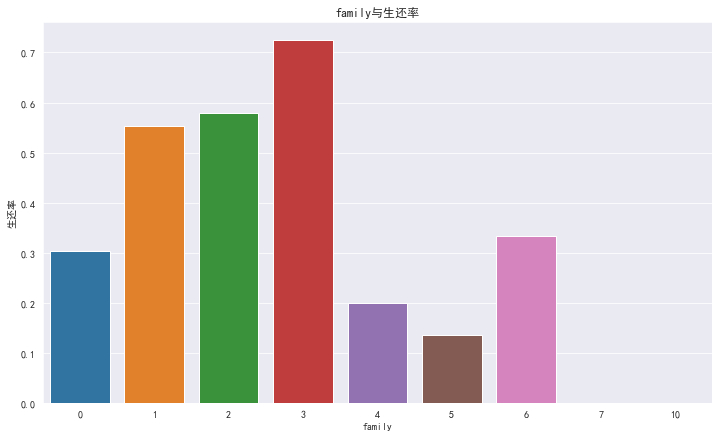

In [5]:
#将SibSp：兄弟姐妹or配偶 和 Parch（父母 or 孩子）合为一列新变量family
#family表示家庭中除自己以外的人数
df['family'] = df['SibSp'] + df['Parch']
kind = sorted(list(df.family.value_counts().index))
proportion_list = []
for i in kind:
    proportion = len(df.query('family == {}'.format(i)).query('Survived == 1')) / len(df.query('family == {}'.format(i)))
    proportion_list.append(proportion)
plt.figure(figsize=(12,7))
sn.barplot(x=kind,y=proportion_list)
plt.title('family与生还率')
plt.xlabel('family')
plt.ylabel('生还率');

### 生还率有关家庭成员数量的分布并不均匀
### 对于一大家人(7 or 10)，存活率为0
### 从0-3，即从一个人到四个人一起，生还率逐步提高
### 但是当家庭总人数变为5或6人时显著下降，7人时又有回升

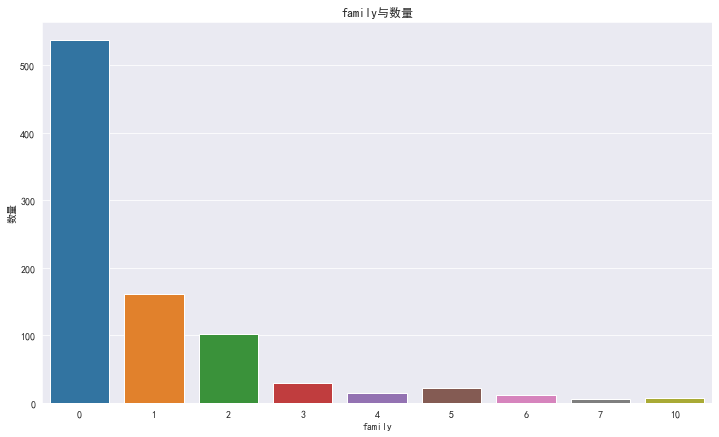

In [27]:
family_type = df.family.value_counts().index
family_amount = df.family.value_counts().values
plt.figure(figsize=(12,7))
sn.barplot(x=family_type,y=family_amount)
plt.title('family与数量')
plt.xlabel('family')
plt.ylabel('数量');

## 结合family看0-16岁这块存活率较大的青少年

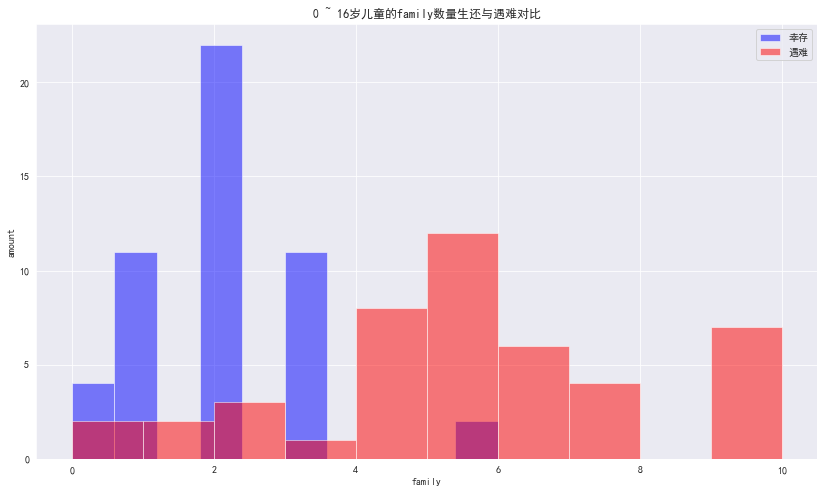

In [116]:
# 图片代码
plt.figure(figsize=(14,8))
df.query('0< Age < 16').query('Survived == 1').family.plot(kind='hist',color='blue',alpha=0.5,label='幸存')
df.query('0< Age < 16').query('Survived == 0').family.plot(kind='hist',color='red',alpha=0.5,label='遇难')
plt.title('0 ~ 16岁儿童的family数量生还与遇难对比')
plt.xlabel('family')
plt.ylabel('amount')
plt.legend()
plt.show()

### 综合发现，幸存的0-16岁青少年大部分的family集中在0-3之间

# 

### 观察各规模家庭的数量分布，可以看到独身一人上船的乘客占了很大比例
### family分布从3-10的占比相当低

In [30]:
#观察家庭规模为6（总规模为7）且存活的家庭特征
df.query('family == 6').query('Survived == 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,6
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,6
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,6
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,6


### 上网查询，Asplund为某姓氏
### 这四个人中，第1，3，4的姓氏相同，票价和票号相同，登船港口相同，应该是一同上船的
### 并且其中有17岁青少年和3、5岁幼儿，会得到优先救援，因此使得family==6的家庭的存活率变高了

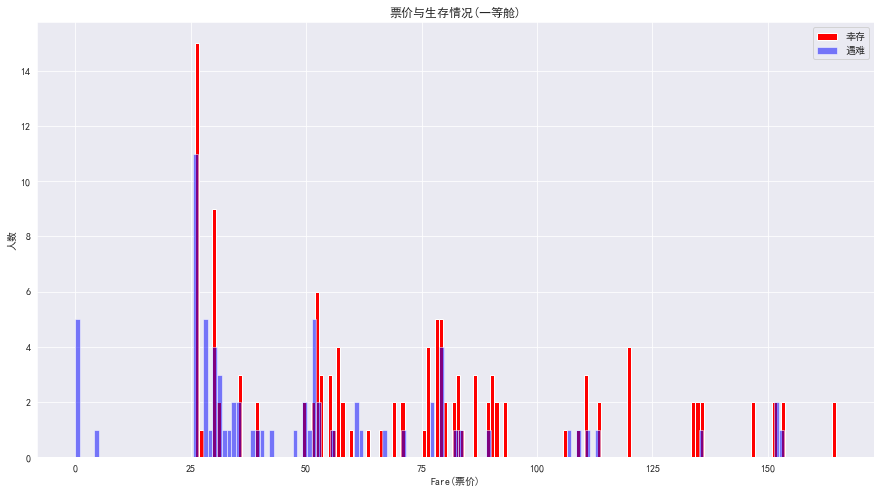

In [31]:
#fare按船舱等级的票价分析
df_first = df.query('Pclass == 1')
plt.figure(figsize=(15,8))
df_first.query('Survived == 1').query('200 > Fare ').Fare.plot(kind='hist',color='red',bins=150,label='幸存')
df_first.query('Survived == 0').query('200 > Fare ').Fare.plot(kind='hist',color='blue',alpha=0.5,bins=150,label='遇难')
plt.title('票价与生存情况(一等舱)')
plt.xlabel('Fare(票价)')
plt.legend()
plt.ylabel('人数');

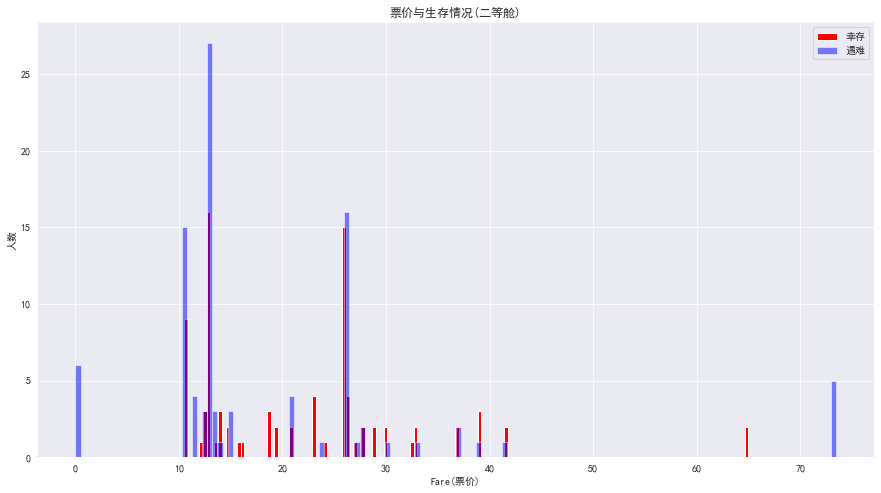

In [32]:
df_two = df.query('Pclass == 2')
plt.figure(figsize=(15,8))
df_two.query('Survived == 1').query('200 > Fare ').Fare.plot(kind='hist',color='red',bins=150,label='幸存')
df_two.query('Survived == 0').query('200 > Fare ').Fare.plot(kind='hist',color='blue',alpha=0.5,bins=150,label='遇难')
plt.title('票价与生存情况(二等舱)')
plt.xlabel('Fare(票价)')
plt.legend()
plt.ylabel('人数');

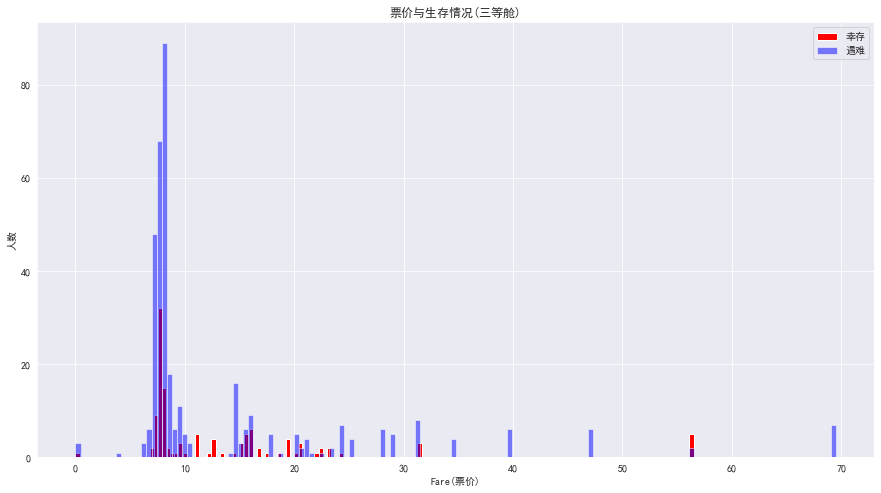

In [33]:
df_three = df.query('Pclass == 3')
plt.figure(figsize=(15,8))
df_three.query('Survived == 1').query('200 > Fare ').Fare.plot(kind='hist',color='red',bins=150,label='幸存')
df_three.query('Survived == 0').query('200 > Fare ').Fare.plot(kind='hist',color='blue',alpha=0.5,bins=150,label='遇难')
plt.title('票价与生存情况(三等舱)')
plt.xlabel('Fare(票价)')
plt.legend()
plt.ylabel('人数');

### 同等船舱中也会有不同票价
### 直观看，船舱等级越低，红色的柱形越少，即存活率越低


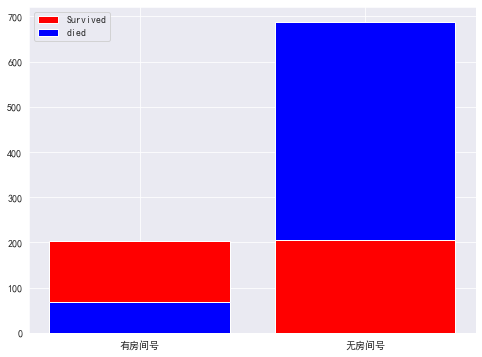

In [39]:
#info中cabin存在大量缺失值
#根据是否缺失划分为有房间号和无房间号
Survived_yes = df_original[~df_original.Cabin.isnull()].query('Survived == 1').shape[0]
died_yes = df_original[~df_original.Cabin.isnull()].query('Survived == 0').shape[0]
Survived_no = df_original[df_original.Cabin.isnull()].query('Survived == 1').shape[0]
died_no = df_original[df_original.Cabin.isnull()].query('Survived == 0').shape[0]
plt.figure(figsize=(8,6))
plt.bar('有房间号',Survived_yes,label = 'Survived',color = 'red',bottom = died_yes)
plt.bar('有房间号',died_yes,label = 'died',color = 'blue')
plt.bar('无房间号',died_no,color = 'blue',bottom = Survived_no)
plt.bar('无房间号',Survived_no,color = 'red')
plt.legend();

### 从存活率上看有房间号的乘客明显存活率更高
### 实际原因猜测可能是房间号本来就没有全部记录，存活下来的乘客大多记得自己的房间号，而死去的乘客有房间号的记录的较少
### 即使因果相反，但可以以此作为判断依据

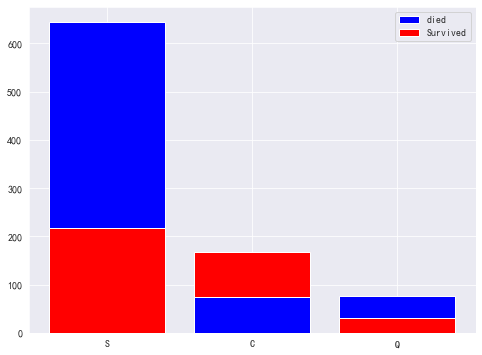

In [41]:
#embaked登船港口分析
#从info看仅有两条缺失，暂时不看
S_died = df_original.query('Embarked == "S"').query('Survived == 0').shape[0]
S_Survived = df_original.query('Embarked == "S"').query('Survived == 1').shape[0]
C_died = df_original.query('Embarked == "C"').query('Survived == 0').shape[0]
C_Survived = df_original.query('Embarked == "C"').query('Survived == 1').shape[0]
Q_died = df_original.query('Embarked == "Q"').query('Survived == 0').shape[0]
Q_Survived = df_original.query('Embarked == "Q"').query('Survived == 1').shape[0]
plt.figure(figsize=(8,6))
plt.bar('S',S_died,label = 'died',color = 'blue',bottom = S_Survived)
plt.bar('S',S_Survived,label = 'Survived',color = 'red')
plt.bar('C',C_Survived,color = 'red',bottom = C_died)
plt.bar('C',C_died,color = 'blue')
plt.bar('Q',Q_died,color = 'blue',bottom = Q_Survived)
plt.bar('Q',Q_Survived,color = 'red')
plt.legend();

### 比例上港口C和港口Q差别不大
### 但S港口上船的人死亡率更高，猜测可能是S港口上船的人中三等舱占比较大，特征之间存在相关性

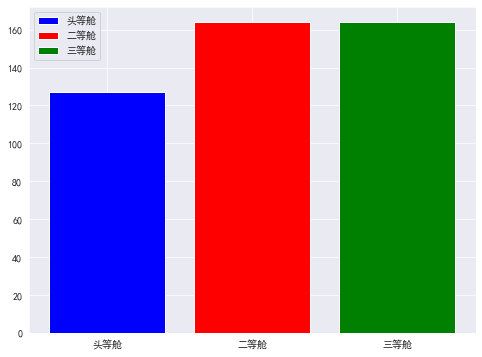

In [42]:
#看S港口上船的人中各船舱占比
S_embarked = df_original.query('Embarked == "S"').shape[0]
S_embarked_first = df_original.query('Embarked == "S"').query('Pclass == 1').shape[0]
S_embarked_second = df_original.query('Embarked == "S"').query('Pclass == 2').shape[0]
S_embarked_third = df_original.query('Embarked == "S"').query('Pclass == 3').shape[0]
plt.figure(figsize=(8,6))
plt.bar('头等舱',S_embarked_first,label = '头等舱',color = 'blue')
plt.bar('二等舱',S_embarked_second,label = '二等舱',color = 'red')
plt.bar('三等舱',S_embarked_second,label = '三等舱',color = 'green')

plt.legend();

### 对比C港口


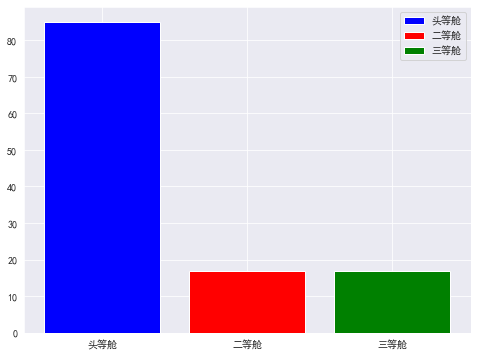

In [43]:
C_embarked = df_original.query('Embarked == "C"').shape[0]
C_embarked_first = df_original.query('Embarked == "C"').query('Pclass == 1').shape[0]
C_embarked_second = df_original.query('Embarked == "C"').query('Pclass == 2').shape[0]
C_embarked_third = df_original.query('Embarked == "C"').query('Pclass == 3').shape[0]
plt.figure(figsize=(8,6))
plt.bar('头等舱',C_embarked_first,label = '头等舱',color = 'blue')
plt.bar('二等舱',C_embarked_second,label = '二等舱',color = 'red')
plt.bar('三等舱',C_embarked_second,label = '三等舱',color = 'green')

plt.legend();

### 对比Q港口

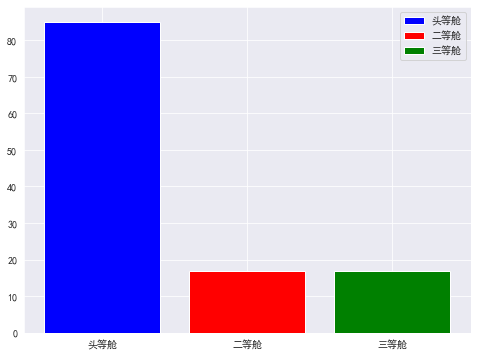

In [44]:
Q_embarked = df_original.query('Embarked == "Q"').shape[0]
Q_embarked_first = df_original.query('Embarked == "Q"').query('Pclass == 1').shape[0]
Q_embarked_second = df_original.query('Embarked == "Q"').query('Pclass == 2').shape[0]
Q_embarked_third = df_original.query('Embarked == "Q"').query('Pclass == 3').shape[0]
plt.figure(figsize=(8,6))
plt.bar('头等舱',C_embarked_first,label = '头等舱',color = 'blue')
plt.bar('二等舱',C_embarked_second,label = '二等舱',color = 'red')
plt.bar('三等舱',C_embarked_second,label = '三等舱',color = 'green')

plt.legend();

### 很明显的，S港口上船的多为二等舱和三等舱的乘客，影响到了最终的死亡率。

# 

# 数据处理

In [45]:
#1.缺失值填充Age,Cabin,Embarked
#2.特征缩放Fare
#3.离散化部分线性feature:Age,Fare,name_len
#4.虚拟化部分category feature：Pclass ,Sex,Embarked
#5.其他特征：family,姓名中的特殊称呼
#6.对取值特别多的分类变量进行因子化：特殊称呼，cabin

In [6]:
#首先标准化fare
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
# 拟合并转化
fare_scaler = scaler.fit(df.Fare.values.reshape(-1,1))
df['scaler_of_fare'] = fare_scaler.fit_transform(df.Fare.values.reshape(-1,1))


In [7]:
#使用乘客个人相关的信息进行预测年龄
#不同方法进行尝试
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

In [8]:
age_df = df[['Age','Pclass','SibSp','Parch','scaler_of_fare']]
#age_df = df[['Age','Pclass',‘family’,'scaler_of_fare']]
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
y = known_age[:,0]
x = known_age[:,1:]
# 创建分类器进行拟合、预测、填充
rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
rfr.fit(x,y)
predictedAges = rfr.predict(unknown_age[:,1::])
df.loc[age_df.Age.isnull(),'Age'] = predictedAges

In [9]:
#全部填充完成
df.Age.isnull().unique()

array([False])

In [10]:
#填充缺失船舱号
df.Cabin[df.Cabin.isnull()] = 'Z'

In [11]:
#填充登船港口，根据之前的分析，Q和C港口的一等舱乘客更高，存活率也更高，因此对存活乘客，填充为Q和C都行
df[df.Embarked.isnull()]
df.Embarked[df.Embarked.isnull()] = 'Q'

In [12]:
#Age分桶,手动效果更好
cut_age = [0,7,11,16,36,38,63,78,100] 
df[['age_0_7','age_7_11','age_11_16','age_16_36','age_36_38','age_38_63','age_63_78','age_78_100']] = pd.get_dummies(pd.cut(df_original.Age,cut_age))
#df[['age_0_7','age_7_11','age_11_16','age_16_36','age_36_38','age_38_63','age_63_78','age_78_100']] = pd.get_dummies(pd.qcut(df['Age'],8))

In [13]:
#Fare划分，自动效果更好，qcut尽量按每组样本数量相同进行分桶
#cut_fare = [] #对票价分桶
#df[['fare_0_7','fare_7_11','fare_11_16','fare_16_36','fare_36_38']] = pd.get_dummies(pd.cut(df_original.Age,cut_age))
df[['fare_0_7','fare_7_10','fare_10_21','fare_21_39','fare_39_512']] = pd.get_dummies(pd.qcut(df['Fare'],5))


In [14]:
#新特征：姓名长度
#首先生成一列姓名长度的特征
df['name_len'] = df.Name.apply(len)
#cut_name_len = []
#同样qcut自动分桶
df[['name_12_20','name_20_25','name_25_30','name_30_82']] = pd.get_dummies(pd.qcut(df.name_len,4))

In [15]:
#Pclass dummy
df[['Pclass_first','Pclass_second','Pclass_third']] = pd.get_dummies(df.Pclass)
#Sex dummy 
df[['sex_female','sex_male']] = pd.get_dummies(df.Sex)
#Embarked dummy
df[['Embarked_c','Embarked_q','Embarked_s']] = pd.get_dummies(df.Embarked)


In [16]:
#特殊称呼
df[['fame','last_name']] = df.Name.str.split(',',expand=True)
df[['call','last_name_2','nothing']] = df.last_name.str.split('.',expand=True)

In [17]:
#df['call'].unique()
#call中包含Mr,Mrs,Miss,Major等等特殊称呼
#对其因子化
df['call_factorize'] = pd.factorize(df.call)[0]

In [18]:
#提取cabin的首字母，因子化
import re #正则模块
df['cabin_first'] = df['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
df['cabin_first'] = pd.factorize(df['cabin_first'])[0]

## 增加child_family_little_2变量
## child_family_little_2代表family<=3且Age<=16的乘客
## 根据之前的分析，16岁往下的青少年，其家庭规模family很大程度上和是否存活相关

In [19]:
#child_family_little_2
df['child_family_little_2'] = 0
df.loc[df.query('0<=Age<16').query('family <=3 ').index,'child_family_little_2'] = 1

## 增加maleabove50:年龄超过50岁的男性
## 根据之前的分析，50岁往上的男性，基本都没有存活

In [20]:
#maleabove50
df['male_than_50'] = 0
df.loc[df.query('Age >= 50').query('Sex == "male"').index,'male_than_50'] = 1

In [21]:
df.Name.str.split(',',expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


## 增加is_group：是否有同伴一同游玩
## 部分乘客Ticket相同，票价也相同，应该是一起来的

In [22]:
df[['Baptismal_name','new_name']] = df.Name.str.split(',',expand=True)
#Ticket相同，且教名相同
list_small_ticket = list(df.groupby(['Ticket','Baptismal_name'],as_index=False).count().query('Pclass==1').Baptismal_name)
chang_Baptismal_name = lambda x:0 if x in list_small_ticket else 1
df['is_group'] = df.Baptismal_name.apply(chang_Baptismal_name)

# 特征重要性评估

## 特征性价比

In [23]:
train= df.drop(columns = ['PassengerId'])
train_feature = train.filter(regex='Survived|Pclass_.*|sex_.*|Embarked_.*|age_.*|scaler_of_fare|family|call_factorize|Cabin_group|Ticket_group|name_.*|cabin_first|is_group|age_is_null|child_family_little_2|male_than_50')
train_feature.drop(columns=['last_name_2','name_len'],inplace=True)

In [24]:
#利用随机森林进行重要性评估，指标为Gini系数
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x, y = train_feature.iloc[:, 1:].values, train_feature.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Pclass                         0.208346
 2) fare_7_10                      0.120575
 3) age_38_63                      0.093301
 4) age_36_38                      0.092873
 5) Survived                       0.068053
 6) fare_10_21                     0.051934
 7) age_16_36                      0.045878
 8) SibSp                          0.032603
 9) age_0_7                        0.032459
10) fare_21_39                     0.031725
11) age_7_11                       0.023126
12) fare_0_7                       0.020496
13) Ticket                         0.020454
14) name_len                       0.019621
15) scaler_of_fare                 0.018831
16) Embarked                       0.017678
17) age_11_16                      0.016880
18) family                         0.016554
19) age_63_78                      0.015901
20) Name                           0.011146
21) age_78_100                     0.010774
22) fare_39_512                    0.010519
23) Parch                       

In [25]:
#train_feature.drop(columns=['Parch','Age','Sex','Fare','Cabin'],inplace=True)
train_feature

,Survived,family,scaler_of_fare,age_0_7,age_7_11,age_11_16,age_16_36,age_36_38,age_38_63,age_63_78,age_78_100,name_12_20,name_20_25,name_25_30,name_30_82,Pclass_first,Pclass_second,Pclass_third,sex_female,sex_male,Embarked_c,Embarked_q,Embarked_s,call_factorize,cabin_first,child_family_little_2,male_than_50,is_group
0,0,1,-0.502445,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
1,1,1,0.786845,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0
2,1,0,-0.488854,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,2,0,0,0,0
3,1,1,0.420730,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,1
4,0,0,-0.486337,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,-0.386671,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,5,0,0,0,0
887,1,0,-0.044381,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,2,6,0,0,0
888,0,3,-0.176263,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,2,0,0,0,1
889,1,0,-0.044381,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0


<AxesSubplot:>

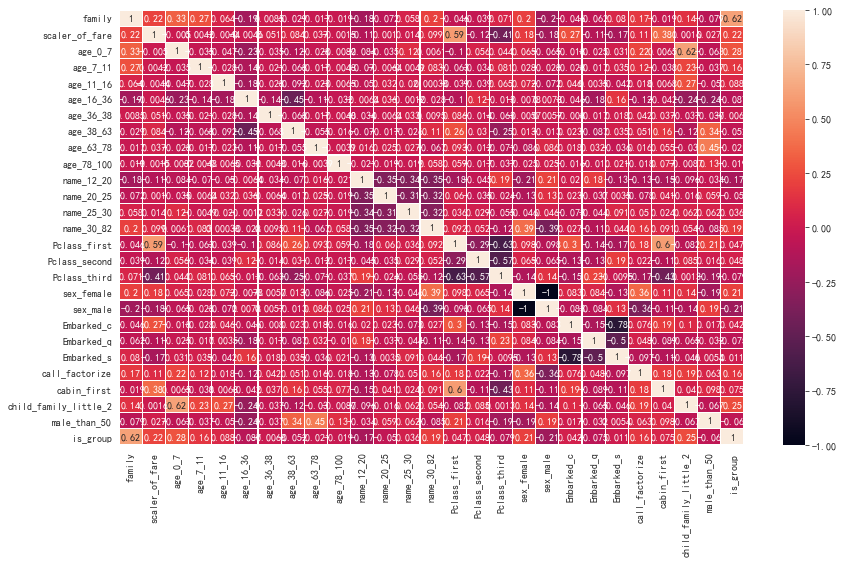

In [37]:
#观察各特征之间相关性
import seaborn as sn
features = list(train_feature.columns[1:])
plt.figure(figsize=(14,8))
colormap = plt.cm.RdBu
sn.heatmap(train_feature[features].corr(),linewidths=0.1,annot=True)

### 尽量尝试删去特征，减少它们之间的强相关性

# 交叉验证

In [30]:
# 交叉验证
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
train_feature_x = train_feature.values[:,1:]
train_feature_y = train_feature.values[:,:1]
#classifier = linear_model.LogisticRegression(penalty='l2',random_state=0)
classifier = linear_model.LogisticRegression(penalty='l2',random_state=0)
cross_val_score(classifier,train_feature_x,train_feature_y,cv=5)

array([0.84357542, 0.82022472, 0.79213483, 0.8258427 , 0.81460674])

# 特征选取

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(
    init=None,
    learning_rate=0.1,
    loss='deviance',
    max_depth=3,
    max_features=None,
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    random_state=None,
    subsample=1.0,
    verbose=0,
    warm_start=False)
gbdt.fit(train_feature_x, train_feature_y)
score = gbdt.feature_importances_
print (gbdt.feature_importances_.shape)

(27,)


In [42]:
score.sort()
score

array([5.07955213e-05, 3.76485570e-04, 7.24141117e-04, 9.19102850e-04,
       1.54527469e-03, 2.64548790e-03, 2.83607596e-03, 3.17071860e-03,
       3.27591485e-03, 3.41902534e-03, 4.72790193e-03, 4.89161384e-03,
       5.58396228e-03, 6.35254925e-03, 6.47612297e-03, 6.64717371e-03,
       9.51083727e-03, 1.05810564e-02, 1.43287763e-02, 4.17850159e-02,
       4.20019780e-02, 5.38180336e-02, 5.60216363e-02, 8.26691817e-02,
       1.06959981e-01, 1.45172758e-01, 3.83508400e-01])

In [43]:
score.sort()
list(zip(score,train_feature.columns[1:]))
#舍弃得分小于0.01的特征


[(5.0795521257175306e-05, 'family'),
 (0.0003764855700046745, 'scaler_of_fare'),
 (0.0007241411166682097, 'age_0_7'),
 (0.0009191028499293583, 'age_7_11'),
 (0.0015452746893463043, 'age_11_16'),
 (0.0026454878994762276, 'age_16_36'),
 (0.0028360759582102485, 'age_36_38'),
 (0.003170718603443436, 'age_38_63'),
 (0.003275914849828039, 'age_63_78'),
 (0.0034190253422005496, 'age_78_100'),
 (0.004727901929443297, 'name_12_20'),
 (0.004891613838417122, 'name_20_25'),
 (0.005583962280567709, 'name_25_30'),
 (0.0063525492527271715, 'name_30_82'),
 (0.006476122966274728, 'Pclass_first'),
 (0.006647173707472856, 'Pclass_second'),
 (0.009510837274841812, 'Pclass_third'),
 (0.01058105636441312, 'sex_female'),
 (0.014328776293690806, 'sex_male'),
 (0.0417850159090884, 'Embarked_c'),
 (0.042001978028390605, 'Embarked_q'),
 (0.05381803358240215, 'Embarked_s'),
 (0.056021636296329426, 'call_factorize'),
 (0.08266918167695349, 'cabin_first'),
 (0.10695998050943312, 'child_family_little_2'),
 (0.145172

In [253]:
test.info()
#测试集在Age和Cabin和Fare上有缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Pclass          418 non-null    int64  
 2   Name            418 non-null    object 
 3   Sex             418 non-null    object 
 4   Age             332 non-null    float64
 5   SibSp           418 non-null    int64  
 6   Parch           418 non-null    int64  
 7   Ticket          418 non-null    object 
 8   Fare            417 non-null    float64
 9   Cabin           91 non-null     object 
 10  Embarked        418 non-null    object 
 11  family          418 non-null    int64  
 12  scaler_of_fare  417 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [31]:
#测试集同样处理
test['family'] = test['SibSp'] + test['Parch']
test.loc[test.Fare.isnull(),'Fare'] = df.Fare.mode()[0]
fare_scaler = scaler.fit(test.Fare.values.reshape(-1,1))
test['scaler_of_fare'] = fare_scaler.fit_transform(test.Fare.values.reshape(-1,1))


In [32]:
test.Cabin[test.Cabin.isnull()] = 'Z'


In [33]:
age_test = test[['Age','Pclass','SibSp','Parch','scaler_of_fare']]
known_age_test = age_test[age_test.Age.notnull()].values
unknown_age_test = age_test[age_test.Age.isnull()].values
y = known_age_test[:,0]
x = known_age_test[:,1:]
# 创建分类器进行拟合、预测、填充
rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
rfr.fit(x,y)
predictedAges = rfr.predict(unknown_age_test[:,1::])
test.loc[age_test.Age.isnull(),'Age'] = predictedAges



In [34]:
cut_age = [0,7,11,16,36,38,63,78,100] 
test[['age_0_7','age_7_11','age_11_16','age_16_36','age_36_38','age_38_63','age_63_78','age_78_100']] = pd.get_dummies(pd.cut(test_original.Age,cut_age))


In [35]:
test[['fare_0_7','fare_7_10','fare_10_21','fare_21_39','fare_39_512']] = pd.get_dummies(pd.qcut(test['Fare'],5))
test['name_len'] = test.Name.apply(len)
#cut_name_len = []
#同样qcut自动分桶
test[['name_12_20','name_20_25','name_25_30','name_30_82']] = pd.get_dummies(pd.qcut(test.name_len,4))

In [36]:
test[['Pclass_first','Pclass_second','Pclass_third']] = pd.get_dummies(test.Pclass)
test[['sex_female','sex_male']] = pd.get_dummies(test.Sex)
test[['Embarked_c','Embarked_q','Embarked_s']] = pd.get_dummies(test.Embarked)

In [37]:
test[['fame','last_name']] = test.Name.str.split(',',expand=True)


In [38]:

test[['call','last_name_2']] = test.last_name.str.split('.',expand=True)
test['call_factorize'] = pd.factorize(test.call)[0]


In [39]:
test['cabin_first'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
test['cabin_first'] = pd.factorize(test['cabin_first'])[0]
test['male_than_50'] = 0
test.loc[test.query('Age >= 50').query('Sex == "male"').index,'male_than_50'] = 1

In [40]:
test['child_family_little_2'] = 0
test.loc[test.query('0<=Age<16').query('family <=3 ').index,'child_family_little_2'] = 1
test[['Baptismal_name','new_name']] = test.Name.str.split(',',expand=True)
#Ticket相同，且教名相同
list_small_ticket = list(test.groupby(['Ticket','Baptismal_name'],as_index=False).count().query('Pclass==1').Baptismal_name)
chang_Baptismal_name = lambda x:0 if x in list_small_ticket else 1
test['is_group'] = test.Baptismal_name.apply(chang_Baptismal_name)

In [41]:
train_feature

,Survived,family,scaler_of_fare,age_0_7,age_7_11,age_11_16,age_16_36,age_36_38,age_38_63,age_63_78,age_78_100,name_12_20,name_20_25,name_25_30,name_30_82,Pclass_first,Pclass_second,Pclass_third,sex_female,sex_male,Embarked_c,Embarked_q,Embarked_s,call_factorize,cabin_first,child_family_little_2,male_than_50,is_group
0,0,1,-0.502445,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
1,1,1,0.786845,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0
2,1,0,-0.488854,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,2,0,0,0,0
3,1,1,0.420730,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,1
4,0,0,-0.486337,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,-0.386671,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,5,0,0,0,0
887,1,0,-0.044381,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,2,6,0,0,0
888,0,3,-0.176263,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,2,0,0,0,1
889,1,0,-0.044381,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0


In [42]:
train_feature_x = train_feature[['Pclass_second','sex_female','Embarked_c','scaler_of_fare','family','child_family_little_2',
                               'cabin_first','call_factorize','name_12_20','male_than_50','is_group']]
train_feature_y = train_feature['Survived']

In [50]:
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier  # K近邻
from sklearn.svm import SVC                         # 支持向量机
from sklearn.tree import DecisionTreeClassifier     # 决策树
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.ensemble import AdaBoostClassifier     # AdaBoost
from xgboost.sklearn import XGBClassifier           # Xgboost
from lightgbm.sklearn import LGBMClassifier 
from sklearn.metrics import accuracy_score

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def check_model(x_train,y_train,clf,clf_name,parameters,k_fold,metrics='accuracy'):
    # 管道机制使得参数集在新数据集（比如测试集）上的重复使用，管道机制实现了对全部步骤的流式化封装和管理。
    pipeline = Pipeline([('scaler',MinMaxScaler()),(clf_name,clf)])
    
    # k折采样
    #folder = KFold(n_splits=k_fold, shuffle=True)
    # 分层k折采样
    folder = StratifiedKFold(n_splits=k_fold, shuffle=True)
    
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=parameters,
                               cv=folder,
                               scoring=metrics)
    gs=grid_search.fit(x_train,y_train)
    print('GridSearch 最优参数：{}，最优分数：{}'.format(gs.best_params_,gs.best_score_))
    return gs

In [45]:
x = train_feature_x
y = train_feature_y
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2)
cross_val_score(classifier,x,y,cv=5)

array([0.81005587, 0.81460674, 0.80337079, 0.8258427 , 0.8258427 ])

In [95]:
num_folds = 7 
svc = SVC()
svc_parameters = {'svc__C':[0.1],'svc__gamma':[0.01]}
svc_model = check_model(train_feature_x,train_feature_y,svc,'svc',svc_parameters,num_folds)
y_pred = svc_model.predict(x_valid)
print(accuracy_score(y_pred,y_valid))


GridSearch 最优参数：{'svc__C': 0.1, 'svc__gamma': 0.01}，最优分数：0.6161593082114736
0.6424581005586593


In [133]:
num_folds = 7 
dtc = DecisionTreeClassifier()
dtc_parameters = {'dtc__max_depth':range(5,20)}

dtc_model = check_model(train_feature_x,train_feature_y,dtc,'dtc',dtc_parameters,num_folds)
y_pred = dtc_model.predict(x_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'dtc__max_depth': 8}，最优分数：0.8237485939257594
0.9106145251396648


In [65]:
num_folds = 7 
rfc = RandomForestClassifier()
#rfc_parameters = {'rfc__max_features':range(2,12),'rfc__n_estimators':range(10,20)} 
rfc_parameters = {'rfc__max_features':range(2,12)}
rfc_model = check_model(train_feature_x,train_feature_y,rfc,'rfc',rfc_parameters,num_folds)
y_pred = rfc_model.predict(x_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'rfc__max_features': 7, 'rfc__n_estimators': 19}，最优分数：0.8249261811023623
0.9664804469273743


In [102]:
num_folds = 7 
knc = KNeighborsClassifier()
knc_parameters = {'knc__n_neighbors':range(6,12)}
knc_model = check_model(train_feature_x,train_feature_y,knc,'knc',knc_parameters,num_folds)
y_pred = knc_model.predict(x_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'knc__n_neighbors': 7}，最优分数：0.8237749578177729
0.8603351955307262


In [59]:
num_folds = 7 
abc = AdaBoostClassifier()
abc_parameters = {'abc__n_estimators':range(70,100)}
abc_model = check_model(train_feature_x,train_feature_y,abc,'abc',abc_parameters,num_folds)
y_pred = abc_model.predict(x_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'abc__n_estimators': 80}，最优分数：0.8215164510686165
0.88268156424581


In [51]:
num_folds = 7 
lr = LogisticRegression()
lr_parameters = {'lr__penalty':['l1', 'l2', 'elsticnet'],'lr__C':range(0,2)}
lr_model = check_model(train_feature_x,train_feature_y,lr,'lr',lr_parameters,num_folds)
y_pred = lr_model.predict(x_valid)
print(accuracy_score(y_pred,y_valid))

GridSearch 最优参数：{'lr__C': 1, 'lr__penalty': 'l2'}，最优分数：0.814820022497188
0.8603351955307262


In [56]:
test_feature = test[['Pclass_second','sex_female','Embarked_c','scaler_of_fare','family','child_family_little_2',
                               'cabin_first','call_factorize','name_12_20','male_than_50','is_group']]

In [57]:
test_feature

,Pclass_second,sex_female,Embarked_c,scaler_of_fare,family,child_family_little_2,cabin_first,call_factorize,name_12_20,male_than_50,is_group
0,0,0,0,-0.497079,0,0,0,0,1,0,0
1,0,1,0,-0.511942,1,0,0,1,0,0,0
2,1,0,0,-0.463770,0,0,0,0,0,1,0
3,0,0,0,-0.482143,0,0,0,0,1,0,0
4,0,1,0,-0.417167,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,-0.493121,0,0,0,0,1,0,0
414,0,1,1,1.314552,0,0,4,8,0,0,0
415,0,0,0,-0.507461,0,0,0,0,0,0,0
416,0,0,0,-0.493121,0,0,0,0,1,0,0


In [60]:
def testPredict(testDF,clf,clfName):
    submission=testDF
    submission_dummy=pd.get_dummies(submission)
    preds=clf.predict(submission_dummy)   # 预测
    predDF=pd.DataFrame()
    predDF['PassengerId']=test['PassengerId']
    predDF['Survived']=pd.Series(preds)

    output=clfName+'_results.csv'
    predDF.to_csv(output,index=False)  # 保存为csv文件
    
testPredict(test_feature,abc_model,'abc')


In [68]:
testPredict(test_feature,rfc_model,'rfc')

In [135]:
testPredict(test_feature,dtc_model,'dtc')

In [61]:
testPredict(test_feature,lr_model,'lr')

# 在选用了11个特征后，随机森林方法达到了80.38%的准确率


![rank](ranking.png)